# Experimental Design Preliminaries

## Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [31]:
from scipy.stats import shapiro
from scipy.stats import anderson

In [3]:
weights = pd.read_csv('chick_weight.csv')
weights.sample(2)

,weight,Time,Chick,Diet
37,49,2,4,1
506,41,0,45,4


In [26]:
chicken_data = pd.read_csv('chick_weight.csv')

In [16]:
wealth_data = pd.read_csv('wealth_data.csv')
wealth_data.sample(2)

,net_wealth,service_involvement,high_wealth
1707,121600.007360,8,0
278,179112.158701,6,0


## Setting up experiments

### Non-random assignment of subjects

In [5]:
# Non-random assignment
group1_non_rand = weights.iloc[0:250, :]
group2_non_rand = weights.iloc[250:, :]

# Compare descriptive statistics of groups
compare_df_non_rand = pd.concat([group1_non_rand['weight'].describe(), group2_non_rand['weight'].describe()], axis=1)
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  250.000000  328.000000
mean   105.876000  133.969512
std     61.548791   75.405361
min     35.000000   39.000000
25%     58.250000   68.000000
50%     89.000000  123.000000
75%    138.750000  184.000000
max    331.000000  373.000000


### Random assignment of subjects

In [6]:
# Randomly assign half
group1_random = weights.sample(250, random_state=42, replace=False)

# Create second assignment
group2_random = weights.drop(group1_random.index)

# Compare assignments
compare_df_random = pd.concat([group1_random['weight'].describe(), group2_random['weight'].describe()], axis=1)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  250.000000  328.000000
mean   120.608000  122.740854
std     69.653347   72.226813
min     35.000000   39.000000
25%     64.000000   62.000000
50%    106.000000  101.500000
75%    163.750000  163.250000
max    373.000000  361.000000


## Experimental data setup

In [11]:
productivity_subjects = pd.DataFrame({'subject_id': range(1, 101)})

In [12]:
# Randomly assign half
block_1 = productivity_subjects.sample(50, random_state=42, replace=False)

# Set the block column
block_1['block'] = 1

# Create second assignment and label
block_2 = productivity_subjects.drop(block_1.index)
block_2['block'] = 2

# Concatenate and print
productivity_combined = pd.concat([block_1, block_2], axis=0)
print(productivity_combined['block'].value_counts())

block
1    50
2    50
Name: count, dtype: int64


### Stratifying an experiment

In [18]:
# Create the first block
strata_1 = wealth_data[wealth_data['high_wealth'] == 1].copy()
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(frac=0.5, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

In [20]:
# Create the first block
strata_1 = wealth_data[wealth_data['high_wealth'] == 1].copy()
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(n=100, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

# Create the second block and assign groups
strata_2 = wealth_data[wealth_data['high_wealth'] == 0].copy()
strata_2['Block'] = 2

strata_2_g1 = strata_2.sample(900, replace=False)
strata_2_g1['T_C'] = 'T'
strata_2_g2 = strata_2.drop(strata_2_g1.index)
strata_2_g2['T_C'] = 'C'

In [21]:
# Create the first block
strata_1 = wealth_data[wealth_data['high_wealth'] == 1].copy()
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(100, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

# Create the second block and assign groups
strata_2 = wealth_data[wealth_data['high_wealth'] == 0].copy()
strata_2['Block'] = 2

strata_2_g1 = strata_2.sample(900, replace=False)
strata_2_g1['T_C'] = 'T'
strata_2_g2 = strata_2.drop(strata_2_g1.index)
strata_2_g2['T_C'] = 'C'

# Concatenate the grouping work
wealth_data_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
print(wealth_data_stratified.groupby(['Block','T_C', 'high_wealth']).size())

Block  T_C  high_wealth
1      C    1              100
       T    1              100
2      C    0              900
       T    0              900
dtype: int64


## Normal data

### Visual normality in an agricultural experiment

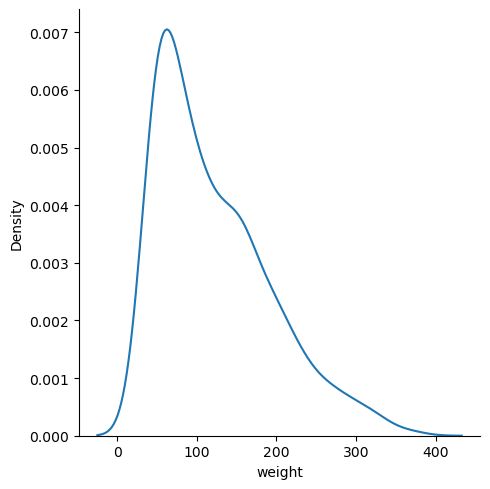

In [27]:
# Plot the distribution of the chickens' weight
sns.displot(data=chicken_data, x='weight', kind="kde")
plt.show()

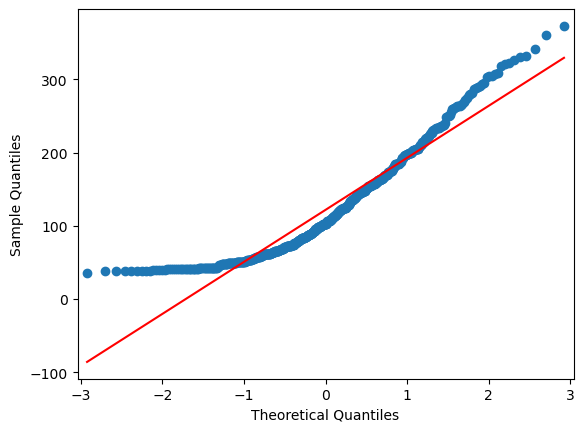

In [29]:
# Plot the qq plot of the chickens' weight
qqplot(data=chicken_data['weight'], line='s')
plt.show()

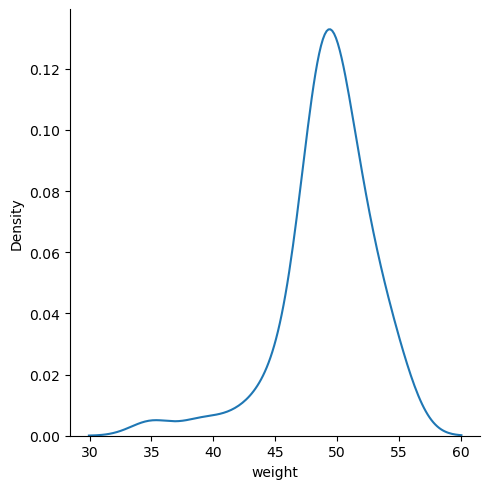

In [30]:
# Subset the data and plot the weight of the subset
subset_data = chicken_data[chicken_data['Time'] == 2].copy()

sns.displot(data=subset_data, x='weight', kind="kde")
plt.show()

### Analytical normality in an agricultural experiment

In [ ]:
# Run a Shapiro-Wilk normality test on the weight column
test_statistic, p_value = shapiro(chicken_data['weight'])

print(f"p: {round(p_value, 4)} test stat: {round(test_statistic, 4)}")

p: 0.0 test stat: 0.9087


In [34]:
# Run the Anderson-Darling test
result = anderson(chicken_data['weight'], dist='norm')

print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 14.6868
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.572 0.652 0.782 0.912 1.085]
